### Stock Market Prediction And Forecasting Using Stacked LSTM

##### Keras and Tensorflow >2.0
    1.We will collect the stock data
    2.preprocess the data - train and test
    3.Create an stacked LSTM model
    4.Predict the test data and plot the output
    5.Predict the 30 days future and plot the output

In [13]:
### Keras and Tensorflow >2.0

### Data Collection
import os
import pandas_datareader as pdr
key=""

In [14]:
df = pdr.get_data_tiingo('AAPL',api_key = key)
df.head()

close    high       low    open    volume  \
symbol date                                                                    
AAPL   2016-03-21 00:00:00+00:00  105.91  107.65  105.1401  105.93  35502678   
       2016-03-22 00:00:00+00:00  106.72  107.29  105.2100  105.25  32444375   
       2016-03-23 00:00:00+00:00  106.13  107.07  105.9000  106.48  25703495   
       2016-03-24 00:00:00+00:00  105.67  106.25  104.8900  105.47  26132955   
       2016-03-28 00:00:00+00:00  105.19  106.19  105.0600  106.00  19411372   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2016-03-21 00:00:00+00:00  24.622670  25.027197  24.443679  24.627320   
       2016-03-22 00:00:00+00:00  24.810984  24.943502  24.459930  24.469229   
       2016-03-23 00:00:00+00:00  24.673817  24.892355  24.620345  24.755188   
       2016-03-24 00:00:00+00:00  24.566873  24.701716  24.385534  24.520376   
       2016-03-28 00:00:00+00:00  24.455280  24.687767  24.425057  24.643594   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2016-03-21 00:00:00+00:00  142010712      0.0          1.0  
       2016-03-22 00:00:00+00:00  129777500      0.0          1.0  
       2016-03-23 00:00:00+00:00  102813980      0.0          1.0  
       2016-03-24 00:00:00+00:00  104531820      0.0          1.0  
       2016-03-28 00:00:00+00:00   77645488      0.0          1.0

In [15]:
df.to_csv('AAPL.csv')

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv('AAPL.csv')

In [18]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-03-21 00:00:00+00:00,105.91,107.65,105.1401,105.93,35502678,24.622670,25.027197,24.443679,24.627320,142010712,0.0,1.0
1,AAPL,2016-03-22 00:00:00+00:00,106.72,107.29,105.2100,105.25,32444375,24.810984,24.943502,24.459930,24.469229,129777500,0.0,1.0
2,AAPL,2016-03-23 00:00:00+00:00,106.13,107.07,105.9000,106.48,25703495,24.673817,24.892355,24.620345,24.755188,102813980,0.0,1.0
3,AAPL,2016-03-24 00:00:00+00:00,105.67,106.25,104.8900,105.47,26132955,24.566873,24.701716,24.385534,24.520376,104531820,0.0,1.0
4,AAPL,2016-03-28 00:00:00+00:00,105.19,106.19,105.0600,106.00,19411372,24.455280,24.687767,24.425057,24.643594,77645488,0.0,1.0


In [19]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-03-12 00:00:00+00:00,121.03,121.1700,119.160,120.40,88105050,121.03,121.1700,119.160,120.40,88105050,0.0,1.0
1254,AAPL,2021-03-15 00:00:00+00:00,123.99,124.0000,120.420,121.41,92590555,123.99,124.0000,120.420,121.41,92590555,0.0,1.0
1255,AAPL,2021-03-16 00:00:00+00:00,125.57,127.2200,124.715,125.70,115227936,125.57,127.2200,124.715,125.70,115227936,0.0,1.0
1256,AAPL,2021-03-17 00:00:00+00:00,124.76,125.8599,122.336,124.05,111932636,124.76,125.8599,122.336,124.05,111932636,0.0,1.0
1257,AAPL,2021-03-18 00:00:00+00:00,120.53,123.1800,120.320,122.88,121469755,120.53,123.1800,120.320,122.88,121469755,0.0,1.0


In [20]:
df1 = df.reset_index()['close']
df1.shape

(1258,)

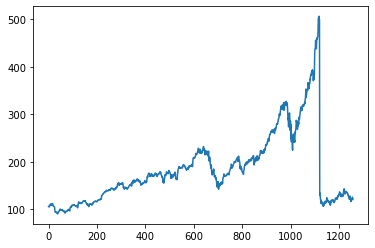

In [21]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [22]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

import numpy as np

In [23]:
df1

0       105.91
1       106.72
2       106.13
3       105.67
4       105.19
         ...  
1253    121.03
1254    123.99
1255    125.57
1256    124.76
1257    120.53
Name: close, Length: 1258, dtype: float64

In [24]:
np.array(df1).reshape(-1,1)

array([[105.91],
       [106.72],
       [106.13],
       ...,
       [125.57],
       [124.76],
       [120.53]])

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1

array([[0.03745039],
       [0.03939868],
       [0.03797956],
       ...,
       [0.08473842],
       [0.08279014],
       [0.07261575]])

In [27]:
len(df1)

1258

In [28]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

In [29]:
training_size,test_size

(817, 441)

In [30]:
df1[0:training_size]
#df1[training_size:len(df1)]

array([[0.03745039],
       [0.03939868],
       [0.03797956],
       [0.03687312],
       [0.03571858],
       [0.04170776],
       [0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.024

In [31]:
train_data,test_data=df1[0:training_size,:], df1[training_size:len(df1),:1]

In [32]:
len(train_data),len(test_data)

(817, 441)

In [33]:
train_data

array([[0.03745039],
       [0.03939868],
       [0.03797956],
       [0.03687312],
       [0.03571858],
       [0.04170776],
       [0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.024

In [34]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [35]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [36]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [37]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [38]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 334ms/step - loss: 0.0079 - val_loss: 0.0545
Epoch 2/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0020 - val_loss: 0.0272
Epoch 3/100
12/12 [==============================] - 2s 177ms/step - loss: 8.5806e-04 - val_loss: 0.0202
Epoch 4/100
12/12 [==============================] - 2s 177ms/step - loss: 5.2914e-04 - val_loss: 0.0197
Epoch 5/100
12/12 [==============================] - 2s 174ms/step - loss: 4.0169e-04 - val_loss: 0.0191
Epoch 6/100
12/12 [==============================] - 3s 220ms/step - loss: 3.8584e-04 - val_loss: 0.0187
Epoch 7/100
12/12 [==============================] - 3s 236ms/step - loss: 3.6885e-04 - val_loss: 0.0186
Epoch 8/100
12/12 [==============================] - 3s 223ms/step - loss: 3.6963e-04 - val_loss: 0.0181
Epoch 9/100
12/12 [==============================] - 3s 212ms/step - loss: 3.5048e-04 - val_loss: 0.0176
Epoch 10/100
12/12 [==============================] - 2s 197ms/

In [43]:
import tensorflow as tf

In [44]:
tf.__version__

'2.3.0'

In [45]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [46]:
train_predict

array([[0.04142267],
       [0.04247111],
       [0.04318491],
       [0.04385348],
       [0.04452462],
       [0.04514673],
       [0.04565948],
       [0.0460968 ],
       [0.04632748],
       [0.04642433],
       [0.04631574],
       [0.04598331],
       [0.04541845],
       [0.04472075],
       [0.04388594],
       [0.04304189],
       [0.04240577],
       [0.04220208],
       [0.04238665],
       [0.04292931],
       [0.04320281],
       [0.04267743],
       [0.04184879],
       [0.04143591],
       [0.04220286],
       [0.04462225],
       [0.04807037],
       [0.05155701],
       [0.05448767],
       [0.05660857],
       [0.05810191],
       [0.05875981],
       [0.05874904],
       [0.05836034],
       [0.05798118],
       [0.05745397],
       [0.05697838],
       [0.05655285],
       [0.05628999],
       [0.05621457],
       [0.05644032],
       [0.05693246],
       [0.05791861],
       [0.05929381],
       [0.06099208],
       [0.06270279],
       [0.06431124],
       [0.065

In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
train_predict

array([[107.56148 ],
       [107.99736 ],
       [108.294136],
       [108.57208 ],
       [108.85111 ],
       [109.10975 ],
       [109.32293 ],
       [109.50474 ],
       [109.600655],
       [109.64091 ],
       [109.59577 ],
       [109.45756 ],
       [109.222725],
       [108.932655],
       [108.58558 ],
       [108.23467 ],
       [107.9702  ],
       [107.88551 ],
       [107.96225 ],
       [108.18786 ],
       [108.30157 ],
       [108.08314 ],
       [107.73864 ],
       [107.566986],
       [107.88583 ],
       [108.89171 ],
       [110.32526 ],
       [111.77483 ],
       [112.99325 ],
       [113.875015],
       [114.49587 ],
       [114.76939 ],
       [114.764915],
       [114.60331 ],
       [114.44568 ],
       [114.226494],
       [114.02877 ],
       [113.851845],
       [113.74256 ],
       [113.711205],
       [113.80506 ],
       [114.009674],
       [114.419655],
       [114.991394],
       [115.69746 ],
       [116.40868 ],
       [117.07739 ],
       [117.6

In [49]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

166.9311472991875

In [50]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

263.0895562912705

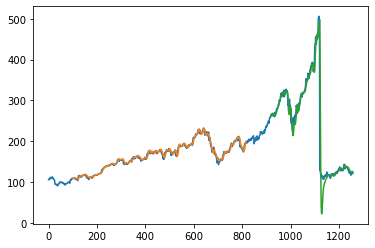

In [51]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
len(test_data)

441

In [53]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [55]:
temp_input

[0.06111846061334936,
 0.059410703547805144,
 0.05943475646422125,
 0.06316295850871917,
 0.05017438364401683,
 0.06008418520745634,
 0.04454600120264579,
 0.04432952495490078,
 0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.111485267588

In [56]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.0594107  0.05943476 0.06316296 0.05017438 0.06008419 0.044546
 0.04432952 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948
 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372
 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194
 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286
 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237
 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581
 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926
 0.07372219 0.07437162 0.09007817 0.08365604 0.076295

7 day output [[0.08846537]]
8 day input [0.05919423 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425
 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975
 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284

15 day output [[0.0941889]]
16 day input [0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727
 0.08543596 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604
 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284
 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575
 0.08286182 0.08367968 0

23 day output [[0.10000873]]
24 day input [0.06313891 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286
 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237
 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581
 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926
 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364
 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184
 0.08093806 0.08473842 0.08279014 0.07261575 0.08286182 0.08367968
 0.08444386 0.08523215 0.08604707 0.0868687  0.08767831 0.08846537
 0.08922727 0.08996628

In [57]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [58]:
import matplotlib.pyplot as plt

In [59]:
len(df1)

1258

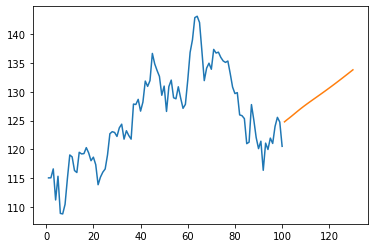

In [60]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

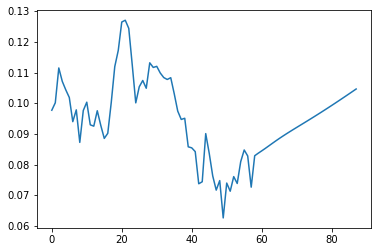

In [61]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [62]:
df3=scaler.inverse_transform(df3).tolist()

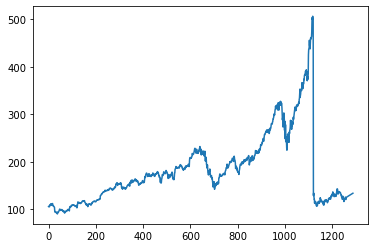

In [63]:
plt.plot(df3)